In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

In [3]:
def create_data_frame(start_date, end_date, symbols, col):
    dates = pd.date_range(start_date, end_date)
    df = pd.DataFrame(index=dates)
    
    for symbol in symbols:
        filename = symbol_to_path(symbol)
        df_tmp = pd.read_csv(filename, index_col='Date', parse_dates=True, usecols=['Date',col], na_values=['nan'])
        df_tmp = df_tmp.rename(columns={col: symbol})
        df = df.join(df_tmp).dropna(subset=[symbols[0]])
    return df

In [9]:
if __name__ == '__main__':
    start_date = '2010-01-01'
    end_date   = '2010-12-31'
    symbols    = ['SPY', 'GOOG', 'IBM', 'GLD']
    col        = 'Close'
    
    df1 = create_data_frame(start_date, end_date, symbols, col)
    print(df1.loc['2010-03-10':'2010-03-15', ['SPY','IBM']])

               SPY     IBM
2010-03-10  114.97  125.62
2010-03-11  115.45  127.60
2010-03-12  115.46  127.94
2010-03-15  115.49  127.83


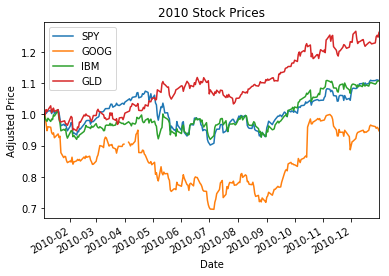

In [18]:
df1 = df1 / df1.iloc[0]
pt = df1.plot(title='2010 Stock Prices')
pt.set_xlabel('Date')
pt.set_ylabel('Adjusted Price')
plt.show()